**INTRODUCTION!**

---

---


Steam Game Reviews Dataset

This Dataset is a collection of reviews of different Games scraped from the Steam API.


---


The various columns are :


1.   Title : Game title
2.   Year : Year the review was written
3.   User_Review : The user review on steam platform
4.   User_Suggestion : A binary variable which represents whether a user suggests whehter you should buy the game or not.
(0 - Not suggested to buy
1 - Suggested to buy)
5.   Review_id : Id of the reviewer

---

---





## **Exploratory Analysis:**

---



---



Explore the dataset to help better understanding of the data and make necessary changes.To begin this exploratory analysis, first let's import libraries.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's get the Dataset and see what it looks like!

---



In [0]:
df= pd.read_csv("/content/drive/My Drive/dataset/steam game/train.csv")

In [3]:
df

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1


In [4]:
df.info

<bound method DataFrame.info of        review_id  ... user_suggestion
0              1  ...               1
1              2  ...               1
2              3  ...               1
3              4  ...               1
4              5  ...               1
...          ...  ...             ...
17489      25535  ...               1
17490      25536  ...               1
17491      25537  ...               1
17492      25538  ...               1
17493      25539  ...               1

[17494 rows x 5 columns]>

In [5]:
print(df.shape)

(17494, 5)


The number of rows and columns in the data set are calculated by df.shape. Now let's see and drop any null values present in this data.

---



In [6]:
df.isnull().sum()

review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64

In [7]:
df = df.dropna()
df.shape

(17316, 5)

In [0]:
df = df.reset_index(drop=True)

After removing the null values the number of rows is 17316. Dropped almost 180 null values!

Reset the index so that the rows dropped are compensated.

In the dataset we can see that 'year' is in float datatype.Let's convert it to int for ease.

---



In [0]:
df = df.astype({'year':'int64'})

In [10]:
df

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015,Not many games have the cute tag right next to...,1
...,...,...,...,...,...
17311,25533,EverQuest II,2013,After I had played it extensively for four yea...,1
17312,25534,EverQuest II,2017,this was the first MMORPG i've ever played but...,0
17313,25535,EverQuest II,2012,Arguably the single greatest mmorp that exists...,1
17314,25536,EverQuest II,2017,"An older game, to be sure, but has its own cha...",1


Here is a list of all the games in this dataset. It has 44 games

---



In [11]:
games_review_count=df['title'].value_counts()
games_review_count

Robocraft                                             840
Eternal Card Game                                     780
Heroes & Generals                                     737
Fractured Space                                       717
War Thunder                                           703
Bless Online                                          700
The Elder Scrolls®: Legends™                          558
Neverwinter                                           545
theHunter Classic                                     517
AdventureQuest 3D                                     514
Creativerse                                           486
DCS World Steam Edition                               482
Infestation: The New Z                                479
Team Fortress 2                                       474
PlanetSide 2                                          470
Path of Exile                                         455
SMITE®                                                451
Fallout Shelte

In [12]:
games_review_count.shape

(44,)

## **DATA VISUALIZATION**

---



 ---



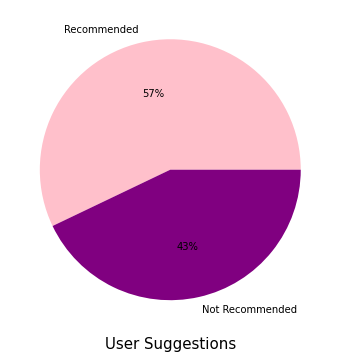

In [13]:
df['user_suggestion'].value_counts().plot.pie(colors=['pink', 'purple'], labels=['Recommended','Not Recommended'], autopct='%1.0f%%', figsize =(6,6))
plt.xlabel("User Suggestions", fontsize = 15)
plt.ylabel("")
plt.show()

The above pie graph shows the percentage suggestions of all the users.

We can see that 57% of the reviews are positive and 43% of them are negative.

---



Text(0.5, 1.0, 'Number of reviews for each game')

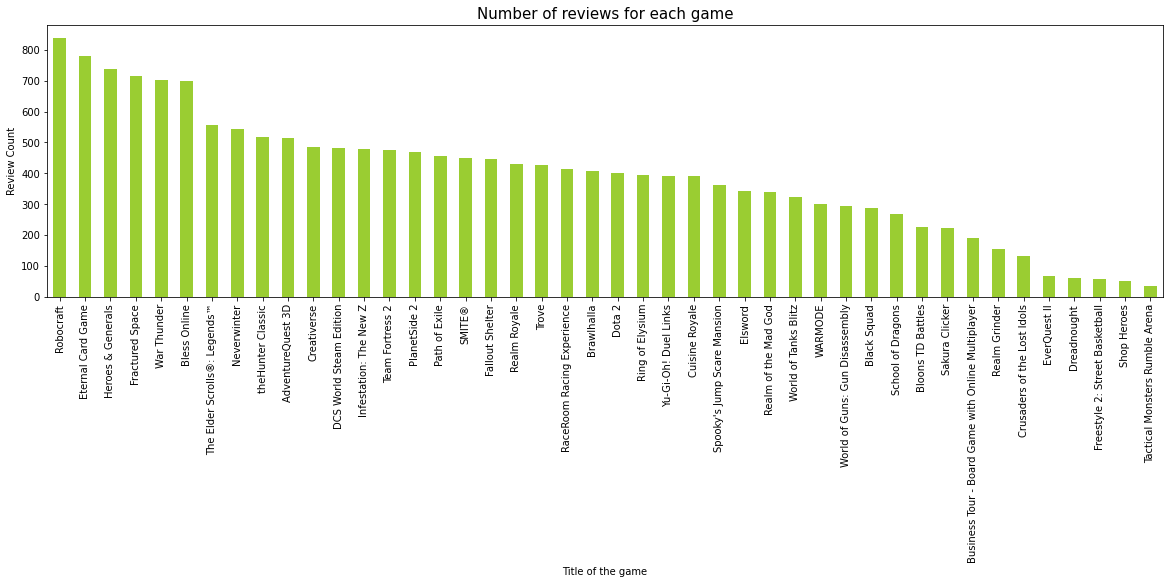

In [14]:
df['title'].value_counts().plot(kind ='bar', figsize=(20,5), color = 'yellowgreen')
plt.xlabel("Title of the game")
plt.ylabel("Review Count")
plt.title("Number of reviews for each game", fontsize=15)

This graph shows the Number of reviews posted for each game. We can see that the most reviewed game is **Robocraft** with more than 800 reviews and the least reviewed game is **Tactical Monsters Rumble Arena** with less than 100 reviews.


---



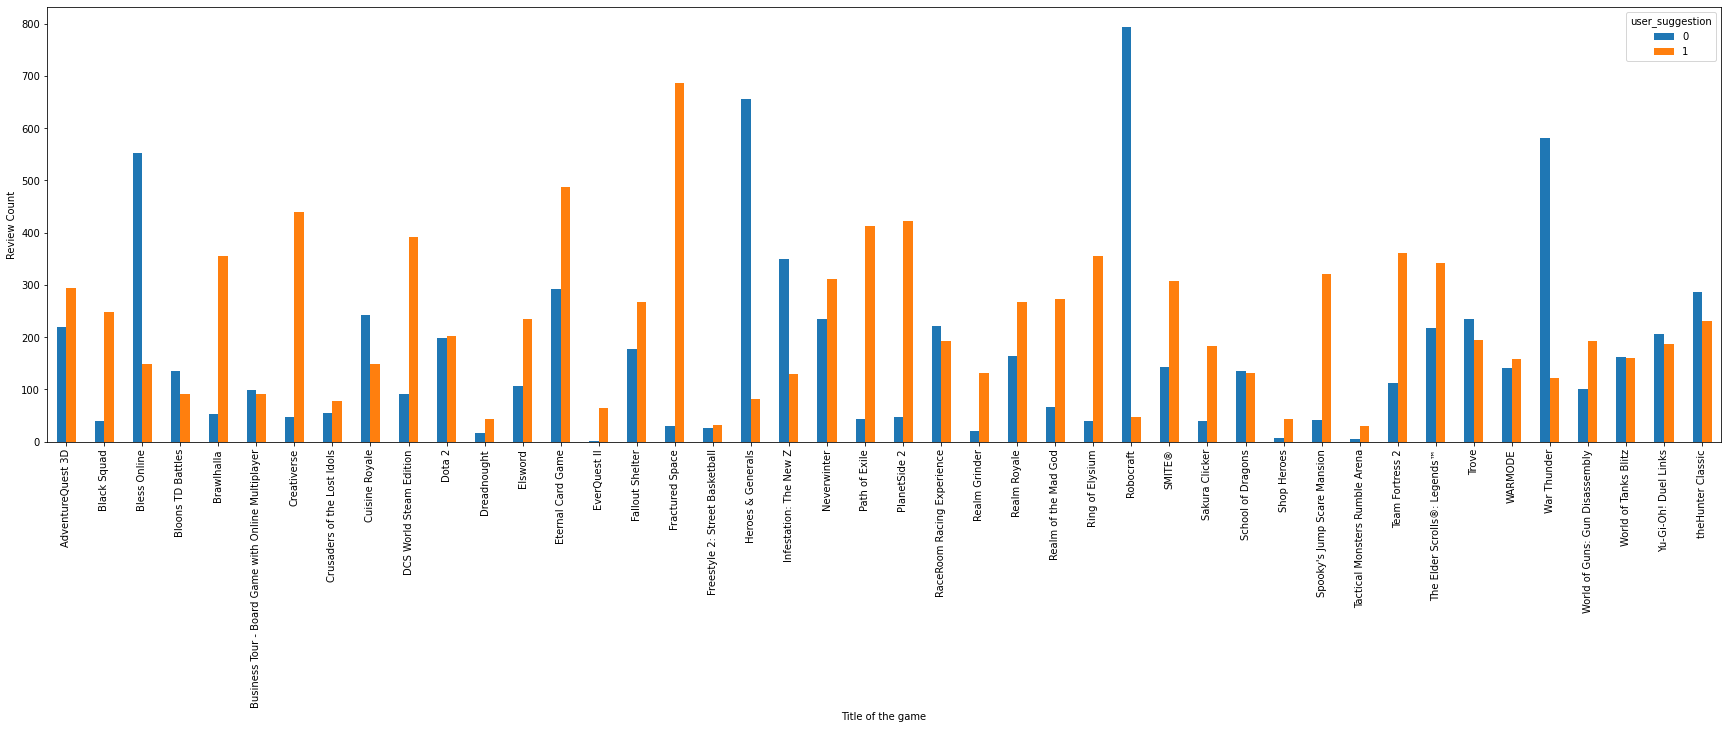

In [15]:
game_suggestions = df.groupby(['title'])['user_suggestion'].value_counts()
game_suggestions.groupby(['title','user_suggestion']).sum().unstack().plot(kind='bar', figsize=(30,8))
plt.xlabel("Title of the game")
plt.ylabel("Review Count")
plt.show()

This multiple bar graph shows the count of both suggested and non-suggested reviews of each game.'0' or negative review is shown by the blue bars and '1' or positive reviews are shown by orange bars. 

We can see that the most reviewed game Robocraft has mostly negative reviews almost 800. We can also see the most suggested game is Fractured Space.

---



Now let's see top 10 games which are the most suggested to buy and which are the top 10 games that the users suggested fellow gamers not to buy.

---



Text(0.5, 1.0, 'Top 10 Most Recommended Games')

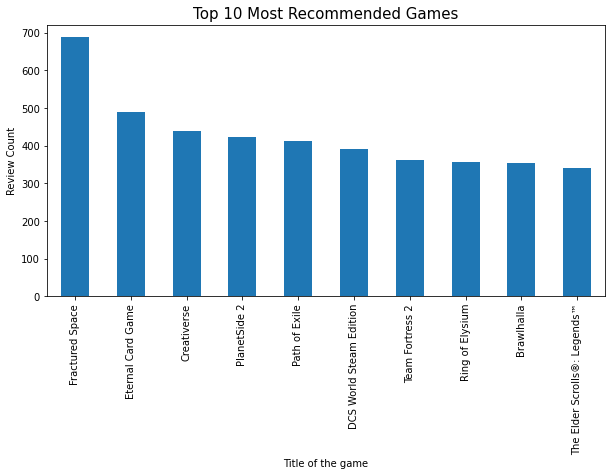

In [16]:
df[df['user_suggestion']== 1]['title'].value_counts()[:10].plot(kind ='bar', figsize=(10,5))
plt.xlabel("Title of the game")
plt.ylabel("Review Count")
plt.title("Top 10 Most Recommended Games", fontsize=15)

Text(0.5, 1.0, 'Top 10 Most Unliked Games')

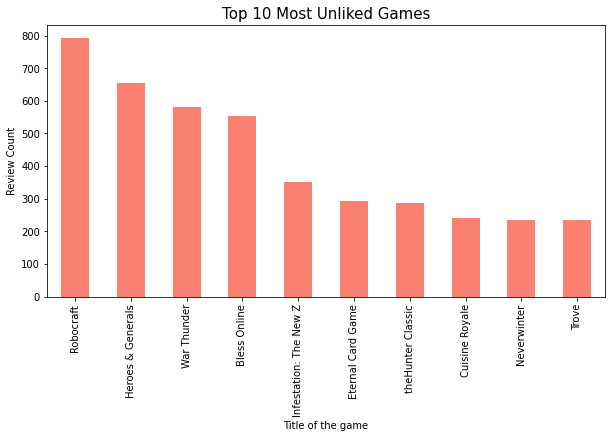

In [17]:
df[df['user_suggestion']== 0]['title'].value_counts()[:10].plot(kind ='bar', figsize=(10,5), color= 'salmon')
plt.xlabel("Title of the game")
plt.ylabel("Review Count")
plt.title("Top 10 Most Unliked Games", fontsize=15)

**Fractured Space** is most suggested game with almost 700 positive reviews whereas **Robocraft** is the game with almost 800 suggestions to not buy the game.

---



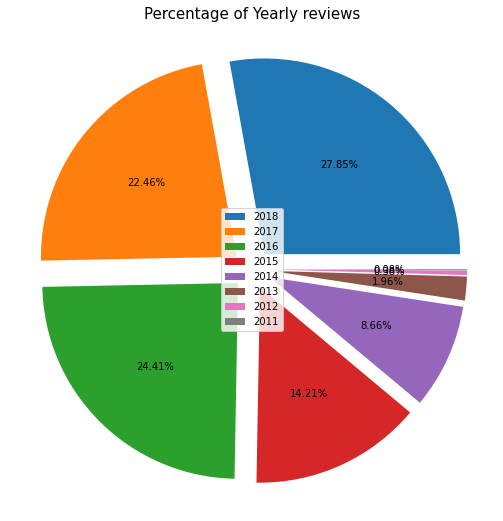

In [18]:
yearly_reviews = df['year'].value_counts().sort_index(ascending=False)
yearly_reviews.plot.pie(labels=None, autopct = '%1.2f%%', explode = np.full(shape=8, fill_value=0.1), figsize = (9,9))
plt.xlabel("")
plt.ylabel("")
plt.title("Percentage of Yearly reviews", fontsize=15)
plt.legend(yearly_reviews.index, loc='center')
plt.show()

This graph shows the percentage of reviews in each year from 2011-2018.
Most reviews are from 2018 and the next is 2016.Below is a bar graph representing the same data.We can say that from the years 2011 Steam has gained popularity and was most popular in 2018 with almost 5000 reviews of games posted.

---



Text(0.5, 1.0, 'Number of reviews for each year')

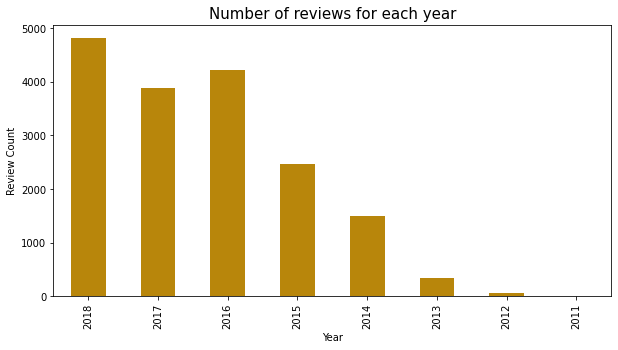

In [19]:
yearly_reviews.plot(kind ='bar', color='darkgoldenrod', figsize=(10,5))
plt.xlabel("Year")
plt.ylabel("Review Count")
plt.title("Number of reviews for each year", fontsize=15)

Let's visualize the top 5 most reviewed games yearly. 

---



In [0]:
df_2018 = df.loc[df['year'] == 2018]
df_2017 = df.loc[df['year'] == 2017]
df_2016 = df.loc[df['year'] == 2016]
df_2015 = df.loc[df['year'] == 2015]
df_2014 = df.loc[df['year'] == 2014]
df_2013 = df.loc[df['year'] == 2013]
df_2012 = df.loc[df['year'] == 2012]
df_2011 = df.loc[df['year'] == 2011]

In [21]:
df_2018

,review_id,title,year,user_review,user_suggestion
86,87,Spooky's Jump Scare Mansion,2018,"So, have you heard of the house on the hillI h...",1
87,88,Spooky's Jump Scare Mansion,2018,"It was a really cute game, not really scary ju...",1
98,99,Spooky's Jump Scare Mansion,2018,it's pretty obviously part of the seemingly-no...,1
197,198,Spooky's Jump Scare Mansion,2018,~Review for Spooky's Jump Scare Mansion~☑ ☐ ...,1
220,221,Spooky's Jump Scare Mansion,2018,When I first played this game i was a bit conf...,1
...,...,...,...,...,...
17243,25465,School of Dragons,2018,Overall it can be a great game i enjoyed it so...,1
17244,25466,School of Dragons,2018,===[ ❤ Audience: ]=== ☑ Kids☐ Everyone☑ Casual...,1
17245,25467,School of Dragons,2018,Product received for freeI think we can all ag...,0
17246,25468,School of Dragons,2018,Im really dissapointed of the Game on steam! i...,0


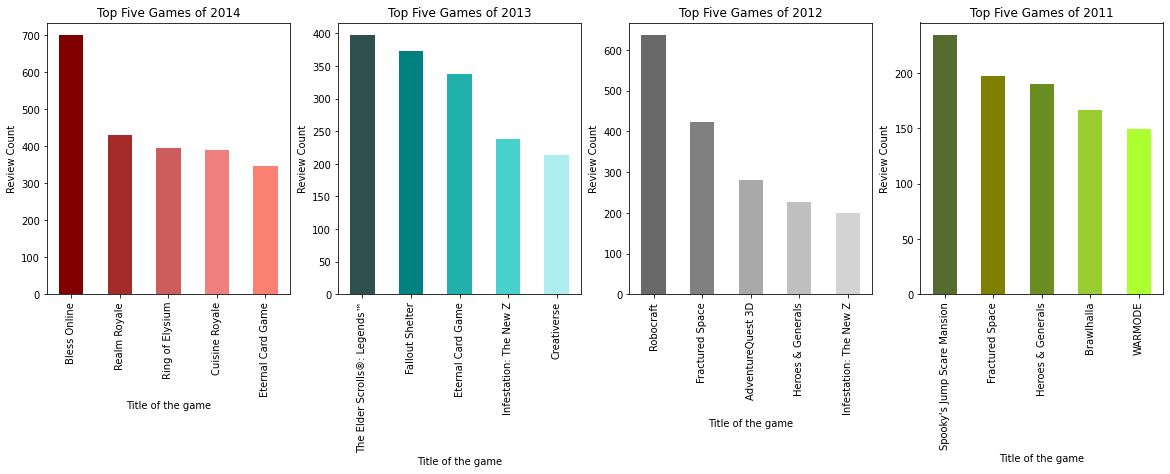

In [22]:
fig= plt.figure(figsize=(30,5))

plt.subplot(1,4,1)
df_2018['title'].value_counts()[:5].plot(kind ='bar', color =["maroon","brown","indianred","lightcoral","salmon"], figsize=(20,5))
plt.xlabel("Title of the game")
plt.ylabel("Review Count")
plt.title("Top Five Games of 2014")

plt.subplot(1,4,2)
df_2017['title'].value_counts()[:5].plot(kind ='bar', color =["darkslategrey","teal", "lightseagreen","mediumturquoise", "paleturquoise"]  ,figsize=(20,5))
plt.xlabel("Title of the game")
plt.ylabel("Review Count")
plt.title("Top Five Games of 2013")

plt.subplot(1,4,3)
df_2016['title'].value_counts()[:5].plot(kind ='bar', color =["dimgrey","grey","darkgrey","silver","lightgrey"], figsize=(20,5))
plt.xlabel("Title of the game")
plt.ylabel("Review Count")
plt.title("Top Five Games of 2012")

plt.subplot(1,4,4)
df_2015['title'].value_counts()[:5].plot(kind ='bar', color =["darkolivegreen","olive", "olivedrab","yellowgreen", "greenyellow"]  ,figsize=(20,5))
plt.xlabel("Title of the game")
plt.ylabel("Review Count")
plt.title("Top Five Games of 2011")

plt.show()

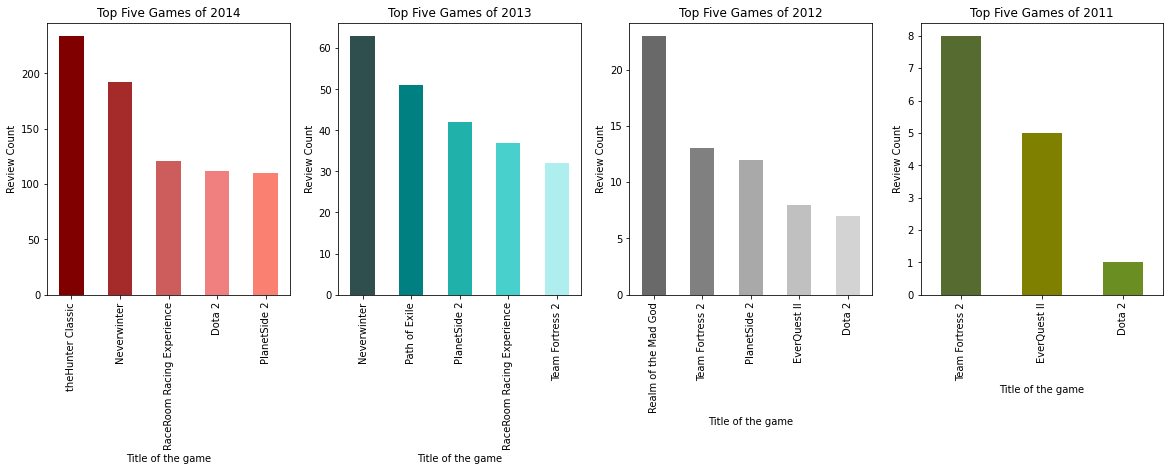

In [23]:
fig= plt.figure(figsize=(30,5))

plt.subplot(1,4,1)
df_2014['title'].value_counts()[:5].plot(kind ='bar', color =["maroon","brown","indianred","lightcoral","salmon"], figsize=(20,5))
plt.xlabel("Title of the game")
plt.ylabel("Review Count")
plt.title("Top Five Games of 2014")

plt.subplot(1,4,2)
df_2013['title'].value_counts()[:5].plot(kind ='bar', color =["darkslategrey","teal", "lightseagreen","mediumturquoise", "paleturquoise"]  ,figsize=(20,5))
plt.xlabel("Title of the game")
plt.ylabel("Review Count")
plt.title("Top Five Games of 2013")

plt.subplot(1,4,3)
df_2012['title'].value_counts()[:5].plot(kind ='bar', color =["dimgrey","grey","darkgrey","silver","lightgrey"], figsize=(20,5))
plt.xlabel("Title of the game")
plt.ylabel("Review Count")
plt.title("Top Five Games of 2012")

plt.subplot(1,4,4)
df_2011['title'].value_counts()[:5].plot(kind ='bar', color =["darkolivegreen","olive", "olivedrab","yellowgreen", "greenyellow"]  ,figsize=(20,5))
plt.xlabel("Title of the game")
plt.ylabel("Review Count")
plt.title("Top Five Games of 2011")

plt.show()
